In [1]:
from sklearn import tree
X = [[0,85,85,0], [0,80,90,1], [2,83,86,0], [1,70,96,0], [1,68,80,0], [1,65,70,1],[2,64,65,1],[0,72,95,0],[0,69,70,0],[1,75,80,0],[0,75,70,1],[2,72,90,1],[2,81,75,0],[1,71,91,1]]
Y = [0,0,1,1,1,0,1,0,1,1,1,1,1,0]
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, Y)

[Text(209.25, 190.26, 'X[0] <= 1.5\ngini = 0.459\nsamples = 14\nvalue = [5, 9]'),
 Text(167.4, 135.9, 'X[2] <= 82.5\ngini = 0.5\nsamples = 10\nvalue = [5, 5]'),
 Text(83.7, 81.53999999999999, 'X[1] <= 66.5\ngini = 0.32\nsamples = 5\nvalue = [1, 4]'),
 Text(41.85, 27.180000000000007, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(125.55000000000001, 27.180000000000007, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(251.10000000000002, 81.53999999999999, 'X[2] <= 95.5\ngini = 0.32\nsamples = 5\nvalue = [4, 1]'),
 Text(209.25, 27.180000000000007, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(292.95, 27.180000000000007, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(251.10000000000002, 135.9, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]')]

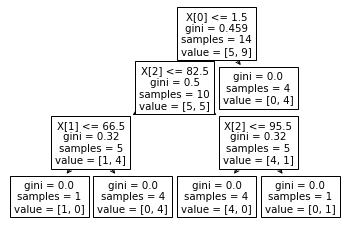

In [2]:
tree.plot_tree(clf) 

[Text(209.25, 190.26, 'X[0] <= 1.5\ngini = 0.459\nsamples = 14\nvalue = [5, 9]'),
 Text(167.4, 135.9, 'X[2] <= 82.5\ngini = 0.5\nsamples = 10\nvalue = [5, 5]'),
 Text(83.7, 81.53999999999999, 'X[1] <= 66.5\ngini = 0.32\nsamples = 5\nvalue = [1, 4]'),
 Text(41.85, 27.180000000000007, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(125.55000000000001, 27.180000000000007, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(251.10000000000002, 81.53999999999999, 'X[1] <= 70.5\ngini = 0.32\nsamples = 5\nvalue = [4, 1]'),
 Text(209.25, 27.180000000000007, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(292.95, 27.180000000000007, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(251.10000000000002, 135.9, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]')]

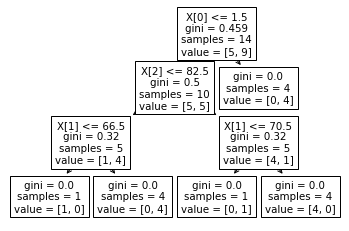

In [5]:
clf1 = tree.DecisionTreeClassifier(criterion='entropy')
clf1 = clf.fit(X, Y)
tree.plot_tree(clf1)

In [ ]:
class Model(object):
  def __init__(self, num_hidden=32, num_output=10, num_inputs=784):
    self.b1 = tf.Variable(tf.random.normal(
                  (1, num_hidden),
                  mean=0.0,
                  stddev=1.0,
                  dtype=tf.dtypes.float32,
                  seed=None,
                  name='b1'))
    self.W1 = tf.Variable(tf.random.normal(
                  (num_inputs, num_hidden),
                   mean=0.0,
                  stddev=1.0,
                  dtype=tf.dtypes.float32,
                  seed=None,
                  name='W1'))
    self.b2 = tf.Variable(tf.random.normal(
                  (1, num_output),
                  mean=0.0,
                  stddev=1.0,
                  dtype=tf.dtypes.float32,
                  seed=None,
                  name='b2'))
    self.W2 = tf.Variable(tf.random.normal(
                  (num_hidden, num_output),
                   mean=0.0,
                  stddev=1.0,
                  dtype=tf.dtypes.float32,
                  seed=None,
                  name='W2'))
  def __call__(self, x):
    return self.forward(x)

  def forward(self, x):
    a1 = tf.sigmoid(
          tf.linalg.matmul(x, self.W1) + self.b1
          )
    a2 = tf.nn.softmax(
          tf.linalg.matmul(a1, self.W2) + self.b2
          )
    return a2

model = Model()



In [ ]:
def loss(y_hat, y):
  return tf.reduce_mean(tf.square(y_hat - y))

def train_step(model, inputs, outputs, learning_rate):
  with tf.GradientTape() as t:
    current_loss = loss(model(inputs), outputs)
    dW1, dW2, db1, db2 = t.gradient(current_loss, [model.W1, model.W2, model.b1, model.b2])
  
  model.W1.assign_sub(learning_rate * dW1)
  model.W2.assign_sub(learning_rate * dW2)
  model.b1.assign_sub(learning_rate * db1)
  model.b2.assign_sub(learning_rate * db2)

train_step(model, x_train, tf.one_hot(y_train, 10, dtype='float32'), 0.01)

In [ ]:
learning_rate = 0.1

train_acc_value = []
test_acc_value = []
train_loss_value = []
test_loss_value = []

for epoch in range(100):
  for inputs, outputs in iter(train_dataset):
    outputs = tf.one_hot(outputs, 10, dtype='float32') 
    train_step(model, inputs, outputs, learning_rate)
    
  current_loss = tf.reduce_mean([loss(model(x), tf.one_hot(y, 10, dtype='float32')) for x, y in iter(train_dataset)])
  current_loss = loss(model(inputs), outputs).numpy()
  
  test_loss = loss(model(x_test), tf.one_hot(y_test,10, dtype='float32')).numpy()
  train_prediction = model(x_train)
  test_prediction = model(x_test)
  
  #credits to github for the following four lines
  train_acc = tf.equal(tf.argmax(train_prediction,1), tf.argmax(tf.one_hot(y_train, 10 ,dtype='float32'), 1))
  test_acc = tf.equal(tf.argmax(test_prediction,1), tf.argmax(tf.one_hot(y_test, 10 ,dtype='float32'), 1))
  train_accuracy = tf.reduce_mean(tf.cast(train_acc, "float"))
  test_accuracy = tf.reduce_mean(tf.cast(test_acc, "float"))

  
  train_acc_value.append(train_accuracy)
  test_acc_value.append(test_accuracy)
  train_loss_value.append(current_loss)
  test_loss_value.append(test_loss)
  
  print(f'The train loss value for epoch {epoch} is {current_loss:0.2f}')
  print(f'The train accuuracy for epoch {epoch} is {train_accuracy:0.2f}')